In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [2]:
dataset= pd.read_csv('C:\data\weather\seattle-weather.csv')
print(dataset.shape)
print(dataset.describe())
print(dataset.head)


(1461, 6)
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000
<bound method NDFrame.head of             date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...  

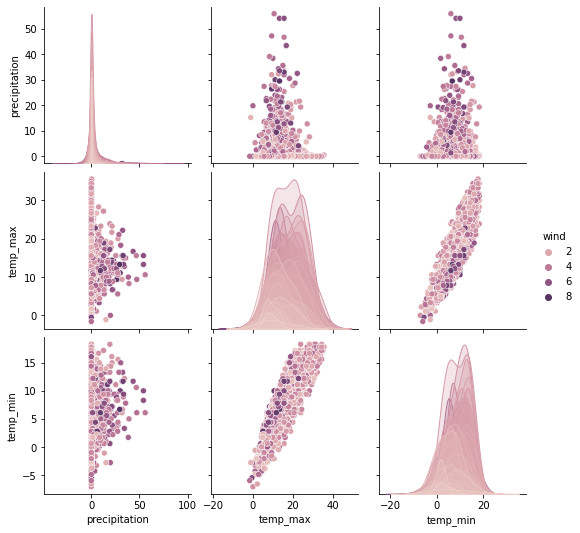

In [3]:
sns.pairplot(data=dataset,hue="wind")
plt.show()

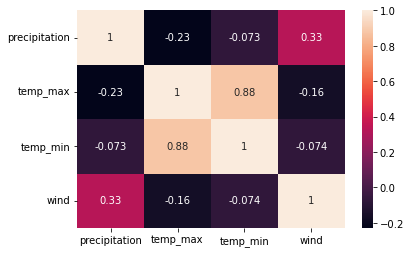

In [4]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [5]:
print(dataset.isna().sum())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [6]:
df=dataset.drop(["date"],axis=1)
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [7]:
#scaling the weather variable using lable encoder
from sklearn import preprocessing
lc=preprocessing.LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])
df.head()


,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


In [8]:
#splitting data
columns=['precipitation', 'temp_max', 'temp_min', 'wind']
x=dataset[columns]
y=df["weather"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [9]:
# Naive_bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred1 = classifier.predict(x_test)
acc4 = accuracy_score(y_test, y_pred1)
print(f"classifier Accuracy score : {acc4}")

classifier Accuracy score : 0.856655290102389


In [10]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred2=knn.predict(x_test)
knn2= accuracy_score(y_test, y_pred2)
print(f"knn Accuracy score : {knn2}")


knn Accuracy score : 0.7986348122866894
